round 1: 100%|██████████| 1024/1024 [00:11<00:00, 90.31it/s] 


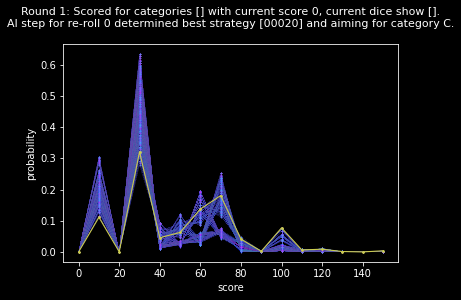

round 1: 100%|██████████| 1024/1024 [00:13<00:00, 75.96it/s]


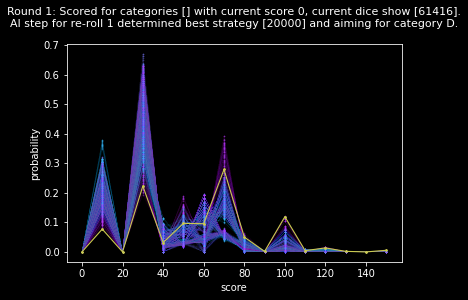

round 1: 100%|██████████| 1024/1024 [00:04<00:00, 235.63it/s]


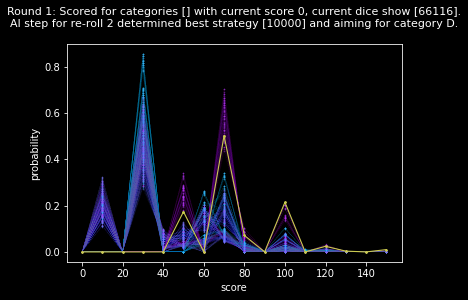

round 1: 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]


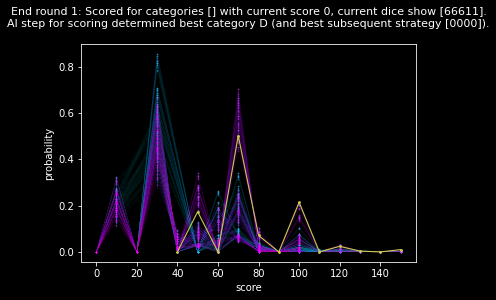

round 2: 100%|██████████| 256/256 [00:01<00:00, 184.95it/s]


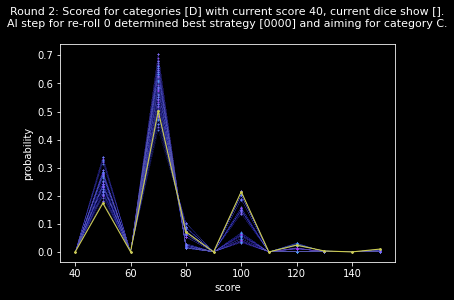

round 2: 100%|██████████| 256/256 [00:01<00:00, 179.46it/s]


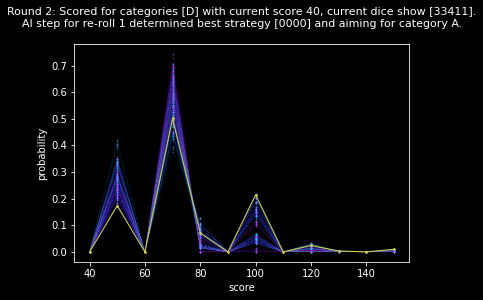

round 2: 100%|██████████| 256/256 [00:00<00:00, 327.42it/s]


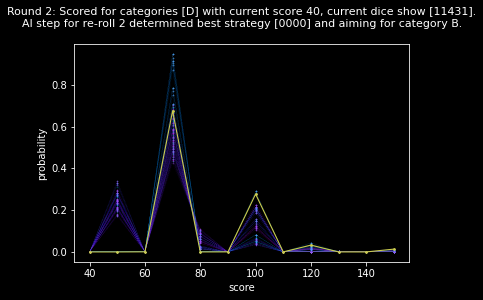

round 2: 100%|██████████| 4/4 [00:00<00:00, 14.15it/s]


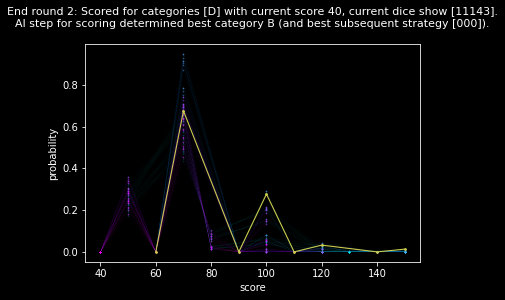

round 3: 100%|██████████| 64/64 [00:00<00:00, 320.74it/s]


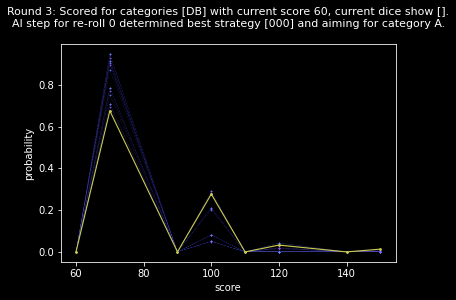

round 3: 100%|██████████| 64/64 [00:00<00:00, 190.97it/s]


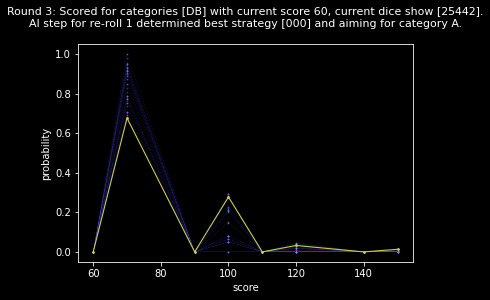

round 3: 100%|██████████| 64/64 [00:00<00:00, 612.57it/s]


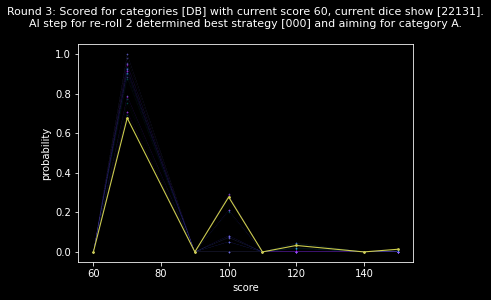

round 3: 100%|██████████| 3/3 [00:00<00:00, 48.88it/s]


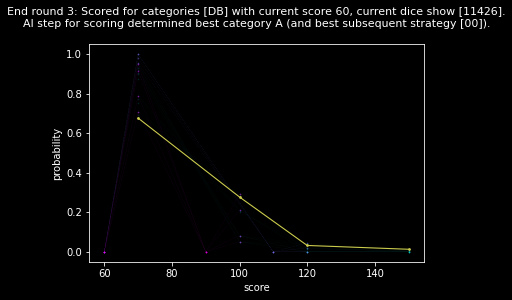

round 4: 100%|██████████| 16/16 [00:00<00:00, 432.02it/s]


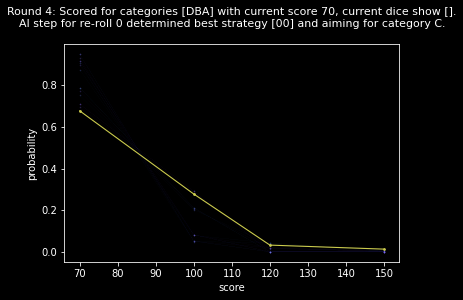

round 4: 100%|██████████| 16/16 [00:00<00:00, 457.02it/s]


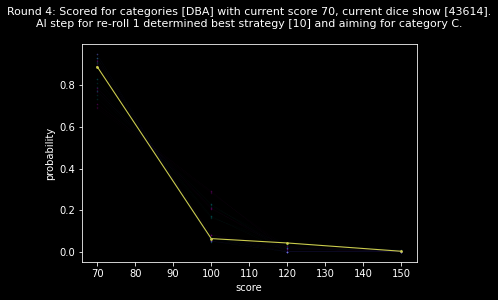

round 4: 100%|██████████| 16/16 [00:00<00:00, 615.13it/s]


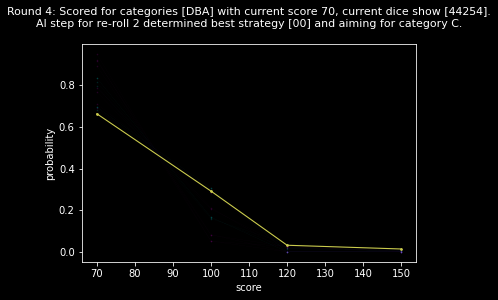

round 4: 100%|██████████| 2/2 [00:00<00:00, 100.42it/s]


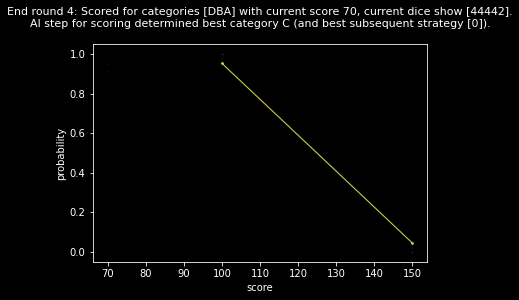

round 5: 100%|██████████| 4/4 [00:00<00:00, 391.92it/s]


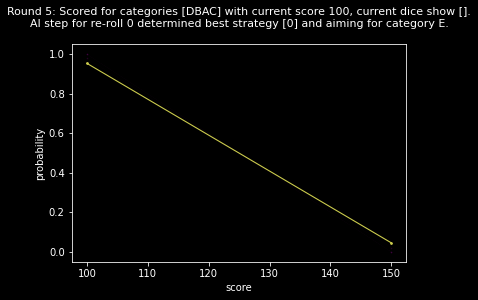

round 5: 100%|██████████| 4/4 [00:00<00:00, 550.02it/s]


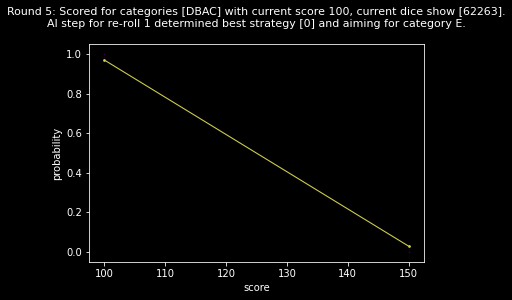

round 5: 100%|██████████| 4/4 [00:00<00:00, 851.94it/s]


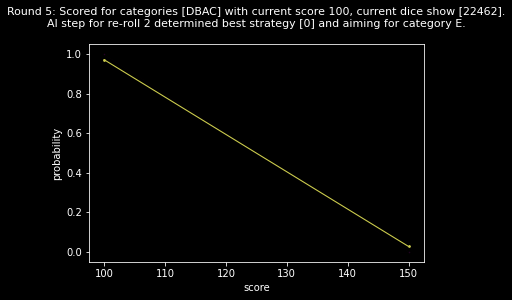

round 5: 100%|██████████| 1/1 [00:00<00:00, 273.73it/s]


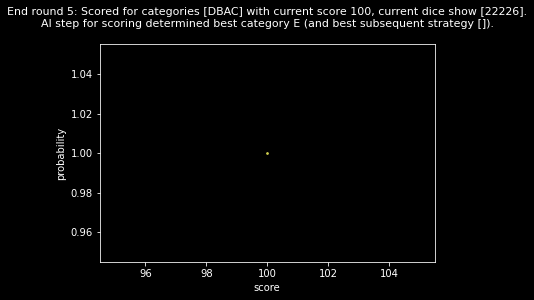

achieved score 100


In [ ]:
import numpy as np
import random
import itertools as it
import matplotlib.pyplot as pp
from matplotlib import cm
from tqdm import tqdm
pp.style.use('dark_background')



### dice stuff
dd = [1, 2, 3, 4, 5, 6] # dice numbers
statevec = np.array(['11','21','22','30','31','41','32']) # considered states 
### initial probabilities for states 
P11 = 720 /7776 # ABCDE, P1, all unique
P21 = 3600/7776 # AABCD, P2, 2-oak
P22 = 1800/7776 # AABBC, P2, 2-oak 2x
P30 = 6   /7776 # AAAAA, P5, 5-oak, yahtzee
P31 = 1200/7776 # AAABC, P3, 3-oak
P41 = 150 /7776 # AAAAB, P4, 4-oak
P32 = 300 /7776 # AAABB, P3, 2-oak, 3-oak, full-house
P1st = np.array([P11,P21,P22,P30,P31,P41,P32]) # 1st roll probability matrix

### transition matrix for yahtzee
Q1_ya = np.array([
       [P11,P21,P22,P30,P31,P41,P32], # 1oak, 11-> 11,21,22,30,31,41,32
       [0,60/216,60/216,1/216,60/216,15/216,20/216], # 2oak, 21-> 11,21,22,30,31,41,32
       [0,60/216,60/216,1/216,60/216,15/216,20/216], # 2oak, 22-> 11,21,22,30,31,41,32
       [0,0,0,1,0,0,0], # 5oak, 30-> 11,21,22,30,31,41,32
       [0,0,0,1/36,20/36,10/36,5/36], # 3oak, 31-> 11,21,22,30,31,41,32
       [0,0,0,1/6,0,5/6,0], # 4oak, 41-> 11,21,22,30,31,41,32
       [0,0,0,1/36,20/36,10/36,5/36] # 3oak, 32-> 11,21,22,30,31,41,32
       ]) 

### transition matrix for full house
Q1_fh = np.array([[P11,P21,P22,P30,P31,P41,P32], # 11->11,21,22,30,31,41,32; roll all again 
                [0,12/36,12/36,0,8/36,1/36,3/36], # 21-> 11,21,22,30,31,41,32
                [0,0,4/6,0,0,0,2/6], # 22-> 11,21,22,30,31,41,32
                [0,0,0,1/36,20/36,10/36,5/36], # 30-> 11,21,22,30,31,41,32
                [0,0,0,0,4/6,1/6,1/6], # 31-> 11,21,22,30,31,41,32
                [0,0,0,0,4/6,1/6,1/6], # 41-> 11,21,22,30,31,41,32
                [0,0,0,0,0,0,1] # 32-> 11,21,22,30,31,41,32
                ])


### dictionary that defines category points, and indicates which states belong to these categories
# categories are described by letters A, B, C, D, E
pdict = {
                      # 11, 21, 22, 30, 31, 41, 32
    'A': (10, np.array([ 0,  1,  1,  1,  1,  1,  1 ]).astype(bool)), # 10 points, yahtzee strategy, (2oak,3oak,4oak,fh,ya)
    'B': (20, np.array([ 0,  0,  0,  1,  1,  1,  1 ]).astype(bool)), # 20 points, yahtzee strategy, (3oak,4oak,fh,ya)
    'C': (30, np.array([ 0,  0,  0,  1,  0,  1,  0 ]).astype(bool)), # 30 points, yahtzee strategy, (4oak,ya)
    'D': (40, np.array([ 0,  0,  0,  0,  0,  0,  1 ]).astype(bool)), # 40 points, full house strategy, (fh)
    'E': (50, np.array([ 0,  0,  0,  1,  0,  0,  0 ]).astype(bool))  # 50 points, yahtzee strategy, (ya)
    }
allcats = list(pdict.keys()) # extract all categories as array
smax = sum([s[0] for s in pdict.values()]) # get maximal possible final score and store in variable smax

### pre-compute: combined transtion matrices for 2 re-rolls (4 possible ways to do that), and also for 1 re-roll (2 possible ways)
Q2_ya = Q1_ya @ Q1_ya # yahtzee - yahtzee
Q2_yf = Q1_ya @ Q1_fh # yahtzee - full-house
Q2_fh = Q1_fh @ Q1_fh # full-house - full-house
Q2_fy = Q1_fh @ Q1_ya # full-house - yahtzee
Q2 = [Q2_ya,Q2_yf,Q2_fh,Q2_fy] # all four combined transition matrices for 2 subsequent re-rolls
Q1 = [Q1_ya,Q1_fh] # the two transition matrices for 1 re-roll


### pre-compute: resulting state probabilities after three rolls (first roll + 2 re-rolls)
p2_ya = P1st @ Q2_ya # yahtzee - yahtzee
p2_yf = P1st @ Q2_yf # yahtzee - full-house
p2_fh = P1st @ Q2_fh # full-house - full-house
p2_fy = P1st @ Q2_fy # full-house - yahtzee
p2 = np.vstack((p2_ya,p2_yf,p2_fh,p2_fy)) # stack all possible strategies, each row a different p2

# function to count how often which dice number occures
def cnter(x):
    return [x.count(1), x.count(2), x.count(3), x.count(4), x.count(5), x.count(6)]
# function to identify a state from dice result
def idstate(x): 
    cnt = np.sort( cnter(x) )[::-1] # first get counts, and then map dice numbers x to state below
    if cnt[0]==5:
        state = '30'
    elif cnt[0]==4:
        state = '41'
    elif cnt[0]==3 and cnt[1]==2:
        state = '32'
    elif cnt[0]==3:
        state = '31'
    elif cnt[0]==2 and cnt[1]==2:
        state = '22'
    elif cnt[0]==2:
        state = '21'
    elif (cnt<=1).all():
        state = '11'
    else:
        raise Exception('idstate: state not identified')
    return np.where(state==statevec)[0].item() # output as single integer (.item() makes 1-sized array to scalar) that points to state in statevec above



### function to make score list unique and sum up probabilities for equal scores
def unique_ps(P,S):
    # S: observed scores with possible multiples, P: probabilities of each score
    Suni = np.unique(S) # all possible scores made unique
    Puni = np.zeros(Suni.size) # init probabilities for these scores
    for ix,suni in enumerate(Suni): # go through all observed scores
        Puni[ix] = ( np.array(P)[np.array(S)==suni] ).sum() # sum up all probabilities that lead to score
    return Puni, Suni



def pstate(i,reroll,dice,strat): 
    # i is turn (0 is current turn, i>0 later turns), 
    # reroll is before which re-roll (0 before first roll, 1 before first re-roll, 2 before second re-roll, 3 after second re-roll)
    # strat is strategy combination to be considered
    if i==0 and reroll>0: # if in current turn and before re-roll (i.e. after dice at least rolled once), ...
        # ... use delta distribution (=distribution with 0s and one 1) as initial state probabilities, as we know which state we are
        p0 = np.zeros(P1st.size) # init initial state probabilities as zeros ...
        p0[idstate(dice)] = 1 # ... and put a 1 at position that corresponds to known state
        if reroll==1: # if before first re-roll (two re-rolls to follow) ...
            return p0 @ Q2[strat[i]] # ... use transition matrix combined out of two Q, and choose according to strategy strat for round i
        elif reroll==2: # if before second re-roll (only one re-roll left) ...
            return p0 @ Q1[strat[i]] # ... use single transition matrix according to strategy strat for round i 
            # (now strat can only by 0 or 1, instead of 0..3 as above)
    else: # if not i==0 or reroll>0, then we are either at a later round or before any dice are rolled in this round, ...
        return p2[strat[i]] # ... in both cases we can't know the state and use the pre-computed state probabilities after 2 re-rolls before any dice rolled

### function to determine probability of scoring for category c; that are the success probabilities in probability tree (always paired with 1 minus that)
# i, reroll, dice and strat needed to determine state probabilities:
    # reroll: 0 is before first roll, 1 before first re-roll, 2 before second re-roll, 3 after second re-roll
    # dice: dice on table, dice=[] means no dice rolled (dice is ignored when reroll=0, if reroll>0 dice is required)
    # strat: strategy combination applied, 0 is ya-ya, 1 is ya-fh, 2 is fh-fh, 3 is fh-ya; first entry is for current round, second for next round, and so on
    # i: round number (i=0 is current round, i>0 is remaining rounds of game), serves as index for strat, and to determine initial state probabilities
def pc(c,i,reroll,dice,strat):
    # first get state probabilities for game stage (i,reroll,dice) and strategy, ...
    # then sum up all strate probabilities that correspond to category c as specified in dictionary pdict
    return pstate(i,reroll,dice,strat)[pdict[c][1]].sum() 




### function to determine final score distribution using our probability tree if success and failure, using the auxiliary functions above
# based on specific strategy (strat), 
# current dice values on table (dice), 
# current score (score), 
# categories already scored for and are not available anymore (catsdone), 
# and stage of re-roll (reroll)
def ps(strat,dice=[],score=0,catsdone=[],reroll=0):
    
    cats = [c for c in allcats if not c in catsdone] # remove categories already scored for from list of available categories
    ncat = len(cats) # number of available categories
        
    S = [] # initobserved scores from probability tree (end of branches)
    P = [] # init probabilities that result from multiplying down the branches
    # game has ncat remaining rounds, each turn either succeeds or not, all unordered combinations are all branches in probability tree
    for branch in it.product([0,1],repeat=ncat): # generate all these unordered combinations to go through all branches
        # sum up points along branch depending on success (branch[i]=1) or failure (branch[i]=0)    
        s = sum( [ pdict[c][0] if branch[i]==1 else 0 for i,c in enumerate(cats) ] )
        # same for scoring probability, but now multiplying succes probability (pc) and failure probability (1-pc)
        p = np.prod( [ pc(c,i,reroll,dice,strat) if branch[i]==1 else (1-pc(c,i,reroll,dice,strat)) for i,c in enumerate(cats) ] ) 
        S.append(s+score) # add score for this branch to list of observed scores, where current score must be added
        P.append(p) # add probability for this branch to probability list
        
    # make score list unique and sum up probabilities for equal scores
    Puni, Suni = unique_ps(P,S)
    
    # output score distribution Puni(Suni) for game stage (dice,score,catsdone,reroll) and strategy (strat)
    return Suni, Puni



### use the score distribution to select best strategy and best category to score for depending on game stage (score,dice,catsdone,reroll)
def scoredist_AI(pobj,score=0,dice=[],catsdone=[],reroll=0,plotit=False,quiet=False): # plotit is just to control whether all and selected distribution shall be selected
    # need to distinguish to case: want to find best strategy (yahtzee or full-house) for re-roll, and want to find best category to score for
    # if reroll<=2, we are still rolling dice and are interested in best strategy
    # if reroll==3, we finished rolling dice for this round and are interested in the best category to score for with the final dice of this round
    # in each case, we will go through all possible strategies and scoring categories, and whenever we increase the objective value (best), ...
    # ... we keep strategy and category. after looping through all, the best stratgey and category will be returned to be used as AI
    
    if reroll <= 2: # if before any re-roll (i.e. decision to make is about dice being re-rolled, not category scored for)
        
        nrounds = len(allcats) - len(catsdone) # number of rounds left
        cats = [c for c in allcats if not c in catsdone] # available categories to score
        best = -np.inf # init objective value tracker to number that is smaller than any value possible (wil increase as we loop through strategies and categories)
        if plotit:
            cmap = cm.get_cmap('cool', nrounds) # get colours
            fig, ax = pp.subplots() # generate figure
            
        # go through all possible strategies        
        for strat in tqdm(it.product(list(range(nstrats)),repeat=nrounds), total=nstrats**nrounds, desc='round '+str(len(catsdone)+1),disable=quiet):
            # strat are tuples of length nrounds, where integers 0..3 or 0..1 indicate strategies at position of game
            
            if not (reroll==2 and strat[0]>=2): # do nothing if before second re-roll (reroll=2) and non-existing strategies used (strat=2 or strat=3)
                # (only 2 strategies possible, since only one re-roll to go, hence only Qy or Qf possible, not combinations of two)
                        
                # now go through all possible categories I could aim to score for this round
                # (necessary because after first dice rolled, success probability for this round will be different from probabilities for subsequent rounds ...
                # ... and because of that we cannot permute the order of scoring categories (e.g. ECDAB) as we did before)
                for cix,c in enumerate(cats):                
                    pcat = pc(c=c,i=0,reroll=reroll,dice=dice,strat=strat) # first determine probability of scoring for category c in this round still (i=0)
                    scat = pdict[c][0] # ... and the points for category c
                    catsdone_now = catsdone + [c] # add c to a temporary list of categories already scored for, so that we do not consider it for rest of tree
                    
                    # get score distribution for rounds after this round
                    S_, P_ = ps(strat[1:],dice=[],score=score,catsdone=catsdone_now,reroll=0) 
                    
                    # now we have the first step in the probability tree (pcat and scat), and all the rest (P_ and S_),
                    # and need to put it together according to the full tree (check the tree)
                    S = np.concatenate(( S_+scat, S_          )) # we either scored in current round (upper half of tree), or not
                    P = np.concatenate(( P_*pcat, P_*(1-pcat) )) # multiplying with pcat (success) gives probabilities for upper half of tree, (1-pcat) (failure) for lower half
                    P, S = unique_ps(P,S) # make score list unique and sum up probabilities for equal scores
                    
                    obj = pobj(S,P) # compute objective to be maximised from probability distribution, defined below, instructs our ProbAI what to do
                    if obj > best: # keep current strategy and category if score distribution leads to a new best 
                        strat_best = strat # best strategy
                        cat_best = c # best category to aim for
                        best = obj # new best objective value
                        Sbest = S # keep best score distribution for plotting later
                        Pbest = P  
                    # check normalisation
                    if not 1-P.sum()<1e-7:
                        raise Exception('score distribution not normalised!',P.sum())      
                    # plot current score distribution, use colour according to category we aim for this round
                    if plotit:
                        ax.plot(S,P,'-o',color=cmap(cix,alpha=0.1),ms=0.7,lw=0.1)            
        if plotit:
            mess = "Round {0}: Scored for categories [{1}] with current score {2}, current dice show [{3}].\nAI step for re-roll {4} determined best strategy [{5}] and aiming for category {6}.\n".format(len(catsdone)+1,"".join(catsdone), score, "".join([str(s) for s in dice]), reroll, "".join([str(s) for s in strat_best]), cat_best)
            ax.plot(Sbest,Pbest,'-o',color=[0.8,0.8,0.3],ms=1.7,lw=1.1)
            ax.set_xlabel('score')
            ax.set_ylabel('probability')
            ax.set_title(mess, fontsize=11)
            pp.show()
    #
    elif reroll == 3: # after both rerolls, only decision left is what category to score for
        idst = idstate(dice) # get final dice state
        nrounds = len(allcats) - len(catsdone) - 1 # number of rounds still to play reduced by one, since scoring category for this round first considered explicitly
        cats = [c for c in allcats if not c in catsdone] # available categories to score
        best = -np.inf # init objective value tracker to number that is smaller than any value possible (wil increase as we loop through strategies and categories)
        if plotit:
            cmap = cm.get_cmap('cool', nrounds+1) # get colours
            fig, ax = pp.subplots() # generate figure
        # first go through possible categories I can still score for
        for cix,c in enumerate(tqdm(cats, desc='round '+str(len(catsdone)+1),disable=quiet)):
            scorstates = np.where(pdict[c][1])[0] # states for which I could score category c
            newscore = score + (idst in scorstates)*pdict[c][0] # new score if scored for that category (current score plus zero or the score for category c)
            # then go through all remaining possible strategies for subsequent rounds as above and keep best
            for strat in tqdm(it.product(list(range(nstrats)),repeat=nrounds), total=nstrats**nrounds, desc='round '+str(len(catsdone)+1), disable=True):                
                # use the newscore that would result from scoring for category c, ...
                # ... add category we are testing to list of categories scored for (catsdone+[c]), ...
                # ... and put reroll=0 as we are always before any dice rolled in all rounds after this current one
                S, P = ps(strat=strat,dice=dice,score=newscore,catsdone=catsdone+[c],reroll=0) # get score distribution for that
                obj = pobj(S,P)# compute objective to be maximised from probability distribution, defined below, instructs our ProbAI what to do
                if obj > best: # keep current strategy and category if score distribution leads to a new best 
                    strat_best = strat # best strategy
                    cat_best = c # best category to aim for
                    best = obj # new best objective value
                    Sbest = S # keep best score distribution for plotting later
                    Pbest = P
                # check normalisation
                if not 1-P.sum()<1e-7:
                    raise Exception('score distribution not normalised!',P.sum())     
                # plot it
                if plotit:
                    ax.plot(S,P,'-o',color=cmap(cix,alpha=0.1),ms=0.7,lw=0.1)            
        if plotit:
            mess = "End round {0}: Scored for categories [{1}] with current score {2}, current dice show [{3}].\nAI step for scoring determined best category {6} (and best subsequent strategy [{5}]).\n".format(len(catsdone)+1,"".join(catsdone), score, "".join([str(s) for s in dice]), reroll, "".join([str(s) for s in strat_best]), cat_best)
            ax.plot(Sbest,Pbest,'-o',color=[0.8,0.8,0.3],ms=1.7,lw=1.1)
            ax.set_xlabel('score')
            ax.set_ylabel('probability')
            ax.set_title(mess, fontsize=11)
            pp.show()
    # output best strategy and best category as found by this probabilistic AI step
    return strat_best, cat_best, Sbest, Pbest




### hard coded application of yahtzee strategy to dice result
def strat_ya(dice):
    cnt = cnter(dice)
    m = max(cnt)
    A = np.argmax(cnt) + 1
    return [A,]*m + random.choices(dd,k=5-m)

### hard coded application of full-house strategy to dice result
def strat_fh(dice): 
    cnt = np.array(cnter(dice))
    sortix = np.argsort(cnt)[::-1] # indices pointing to sorted dice counts in descending order
    m = cnt[sortix][:2] # two highest counts of oaks
    m[0] = min(m[0],3) # don't count more than three for highest count (can be 1,2,3)
    m[1] = min(m[1],2) # don't count more than two for highest count (can be 0,1,2)    
    A = sortix[:2] + 1 # numbers to collect
    if (m==1).all(): # ABCDE
        m = np.array([0,0]) # re-roll all 
        A = np.array([0,0]) # and don't collect any specific number
    elif m[1]==0: # if AAAAA
        A[1] = 0 # ... don't collect any specific second number
    return [A[0],]*m[0] + [A[1],]*m[1] + random.choices(dd,k=5-sum(m))





####################################################################################################################
### let's play
####################################################################################################################

### Objective functions, change depending on which player you want. 
#pobj = lambda score,prob : (prob*score).sum() # using this will maximises expected final score (average score)
pobj = lambda score,prob : prob[score>=120].sum() # using this will maximise probability of scoring 120 or more points
#pobj = lambda score,prob : prob[score>=90].sum() # using this will maximise probability of scoring 90 or more points
#pobj = lambda score,prob : prob[score>=50].sum() # using this will maximise probability of scoring 50 or more points

# You can think of any objective functions, in particular a function that uses information about other players (expected) score, ...
# ... which would make independent AI agents to tournament AI agents

score = 0 # start with zero score
dice = [] # start without dice numbers
catsdone = [] # no categories scored for yet
reroll = 0 # before first re-roll
nstrats = len(Q2) # that many strategies to choose from (Q combinations)

# go through the 5 rounds
for rnd in range(len(allcats)):

    ### before first roll (that is just to plot score distribution, as no decision to make yet)
    strat_best, cat_best, Sbest, Pbest = scoredist_AI(pobj, score=score,dice=dice,catsdone=catsdone,reroll=reroll,plotit=True)
    
    ### roll dice first time
    dice = random.choices(dd,k=5) # roll all dice
    
    ### AI_step to decide what to do next
    reroll = 1 # interested in best choice for first re-roll
    # best strategy for first re-roll, and category we are aiming for just for interest
    strat_best, cat_best, Sbest, Pbest = scoredist_AI(pobj, score=score,dice=dice,catsdone=catsdone,reroll=reroll,plotit=True) 
    
    ### first re-roll based on first entry in best strategy combination
    if strat_best[0] in [0,1]: # if yahtzee strategy best
        dice = strat_ya(dice) # ... apply yahtzee strategy for re-roll
    elif strat_best[0] in [2,3]: # if full-house strategy
        dice = strat_fh(dice) # ... apply full-house strategy for re-roll
    
    ### AI step to decide what to do now
    reroll = 2 # interested in best choice for second re-roll
    # best strategy for second re-roll, and category we are aiming for just for interest
    strat_best, cat_best, Sbest, Pbest = scoredist_AI(pobj, score=score,dice=dice,catsdone=catsdone,reroll=reroll,plotit=True)
    
    ### second re-roll based on first entry in best strategy combination
    if strat_best[0] in [0]: # yahtzee strategy
        dice = strat_ya(dice)
    elif strat_best[0] in [1]: # full-house strategy
        dice = strat_fh(dice)
        
    ### AI_step to decide what category to score for
    reroll = 3 # reroll=3 means after second re-roll, i.e. no more dice rolls this round
    # best category to score for this round, best strategy for subsequence rounds just for interest
    strat_best, cat_best, Sbest, Pbest = scoredist_AI(pobj, score=score,dice=dice,catsdone=catsdone,reroll=reroll,plotit=True)
    
    ### update scoreboard based on best category to score for from AI step above
    idst = idstate(dice) # get final dice state for this round
    scorstates = np.where(pdict[cat_best][1])[0] # get states for which I could score category c    
    score += (idst in scorstates) * pdict[cat_best][0] # add either 0 or the score of category c to current score, depending on success or failure
    catsdone += [cat_best] # add category to list of categories scored for (those will no be available anymore in subsequent rounds)
    reroll = 0 # reset reroll to 0 (now again before any dice are rolled)
    dice = [] # and also reset dice to nothing (same reason)

print('achieved score',score)


